<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/AddingSpain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
total_cases = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_cases.csv", index_col='date')
total_cases[['France', 'Italy', 'Spain']].tail(3)

,France,Italy,Spain
date,,,
2020-03-19,9134,35713,13716
2020-03-20,10995,41035,17147
2020-03-21,12612,47021,19980


In [0]:
EU_list = ['France', 'Italy', 'Spain']

In [0]:
TIPPING_POINT = 100

In [0]:
France_lockdown = '2020-03-18'
Italy_lockdown = '2020-03-10'
Spain_lockdown = '2020-03-15'

In [0]:
cases = {}
for country in EU_list:
  cases[country] = total_cases[country][total_cases[country] > TIPPING_POINT]

In [7]:
cases["Italy"].head(2)

date
2020-02-24    132
2020-02-25    229
Name: Italy, dtype: int64

In [8]:
cases["France"].head(2)

date
2020-03-02    130
2020-03-03    178
Name: France, dtype: int64

In [9]:
cases["Spain"].head(2)

date
2020-03-03    114
2020-03-04    151
Name: Spain, dtype: int64

On February 24, Italy reaches more than 100 cases and on March 10 Italy imposes lockdown. On March 3, Spain reaches more than 100 cases and on March 15 Spain imposes lockdown. On March 3, France reaches more than 100 cases and on March 18 France imposes lockdown (it was actually the day before but at noon).

In [10]:
France_gap = (pd.to_datetime(France_lockdown) - pd.to_datetime(cases["France"].keys()[0])).days
France_gap

16

In [11]:
Italy_gap = (pd.to_datetime(Italy_lockdown) - pd.to_datetime(cases["Italy"].keys()[0])).days
Italy_gap

15

In [12]:
Spain_gap = (pd.to_datetime(Spain_lockdown) - pd.to_datetime(cases["Spain"].keys()[0])).days
Spain_gap

12

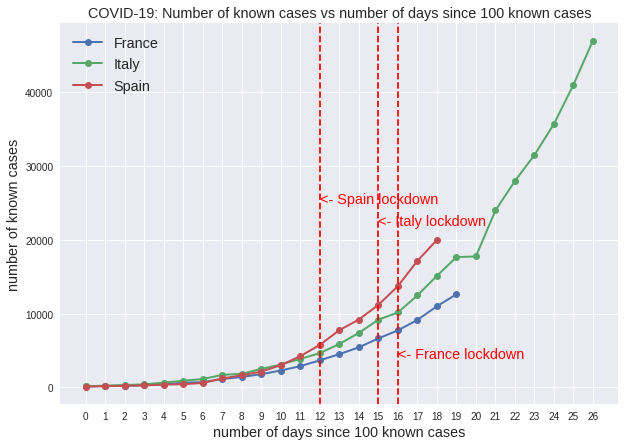

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
for country in EU_list:
  plt.plot(np.arange(len(cases[country])), cases[country], label=country, linewidth=2, marker='o')
plt.axvline(Spain_gap, color='red', linestyle='dashed')
plt.axvline(France_gap, color='red', linestyle='dashed')
plt.axvline(Italy_gap, color='red', linestyle='dashed')
plt.annotate('<- Italy lockdown', (Italy_gap,22000.0), color='red', fontsize='x-large')
plt.annotate('<- Spain lockdown', (Spain_gap,25000.0), color='red', fontsize='x-large')
plt.annotate('<- France lockdown', (France_gap,4000.0), color='red', fontsize='x-large')
ax.set_title('COVID-19: Number of known cases vs number of days since 100 known cases', fontsize='x-large')
ax.set_xlabel('number of days since 100 known cases', fontsize='x-large')
ax.set_ylabel('number of known cases', fontsize='x-large')
ax.set_xticks(np.arange(len(cases["Italy"])))
plt.legend(fontsize='x-large')
plt.show()

In logarithmic scale:

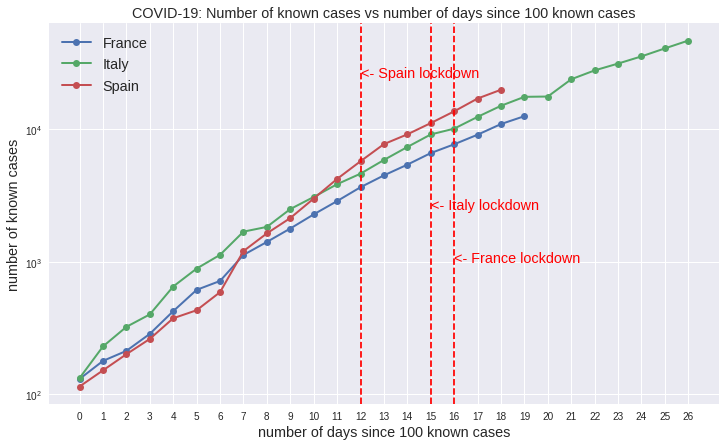

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
for country in EU_list:
  plt.plot(np.arange(len(cases[country])), cases[country], label=country, linewidth=2, marker='o')
plt.axvline(Spain_gap, color='red', linestyle='dashed')
plt.axvline(France_gap, color='red', linestyle='dashed')
plt.axvline(Italy_gap, color='red', linestyle='dashed')

plt.annotate('<- Italy lockdown', (Italy_gap,2500.0), color='red', fontsize='x-large')
plt.annotate('<- Spain lockdown', (Spain_gap,25000.0), color='red', fontsize='x-large')
plt.annotate('<- France lockdown', (France_gap,1000.0), color='red', fontsize='x-large')
ax.set_title('COVID-19: Number of known cases vs number of days since 100 known cases', fontsize='x-large')
ax.set_xlabel('number of days since 100 known cases', fontsize='x-large')
ax.set_ylabel('number of known cases', fontsize='x-large')
ax.set_xticks(np.arange(len(cases["Italy"])))
plt.yscale("log")
plt.legend(fontsize='x-large')
plt.show()